In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,859 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and d

# 챗봇 실습
* https://github.com/NLP-kr/tensorflow-ml-nlp-tf2/tree/master/6.CHATBOT

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ChatBotData.csv')
df

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font', family='NanumBarunGothic')

In [3]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 313 kB/s 
     |████████████████████████████████| 448 kB 63.4 MB/s 


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Okt: twitter 말뭉치로 학습 -> sns에 적합
from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud

data 별도 저장

In [8]:
DATA_PATH = '/content/drive/MyDrive/data/'
data = pd.read_csv(DATA_PATH + 'ChatBotData.csv', encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


EDA

In [9]:
sentences = list(data['Q']) + list(data['A'])

In [10]:
tokened_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokened_sentences]
sent_len_by_eumjeol = [len(s.replace(" ", "")) for s in sentences] #띄어쓰기 다 붙여서 len 한번에 구하기

In [11]:
tokened_sentences[:10]

[['12시', '땡!'],
 ['1지망', '학교', '떨어졌어'],
 ['3박4일', '놀러가고', '싶다'],
 ['3박4일', '정도', '놀러가고', '싶다'],
 ['PPL', '심하네'],
 ['SD카드', '망가졌어'],
 ['SD카드', '안돼'],
 ['SNS', '맞팔', '왜', '안하지ㅠㅠ'],
 ['SNS', '시간낭비인', '거', '아는데', '매일', '하는', '중'],
 ['SNS', '시간낭비인데', '자꾸', '보게됨']]

In [13]:
sent_len_by_token[:10]

[2, 3, 3, 4, 2, 2, 2, 4, 7, 4]

In [14]:
sent_len_by_eumjeol[:10]

[5, 9, 10, 12, 6, 8, 6, 11, 17, 14]

In [16]:
# 형태소 분석
okt = Okt()
morph_tokenized_sentences = [okt.morphs(s) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

In [17]:
morph_tokenized_sentences[:10]

[['12시', '땡', '!'],
 ['1', '지망', '학교', '떨어졌어'],
 ['3', '박', '4일', '놀러', '가고', '싶다'],
 ['3', '박', '4일', '정도', '놀러', '가고', '싶다'],
 ['PPL', '심하네'],
 ['SD', '카드', '망가졌어'],
 ['SD', '카드', '안', '돼'],
 ['SNS', '맞팔', '왜', '안', '하지', 'ㅠㅠ'],
 ['SNS', '시간', '낭비', '인', '거', '아는데', '매일', '하는', '중'],
 ['SNS', '시간', '낭비', '인데', '자꾸', '보게', '됨']]

Text(0, 0.5, 'Number of sentence')

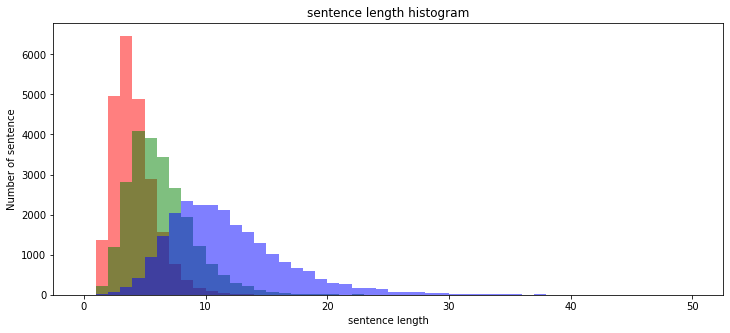

In [19]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='eumjeol')
plt.title("sentence length histogram")
plt.xlabel('sentence length') # 20정도 선에서 자르기
plt.ylabel('Number of sentence')

Text(0, 0.5, 'Number of sentence')

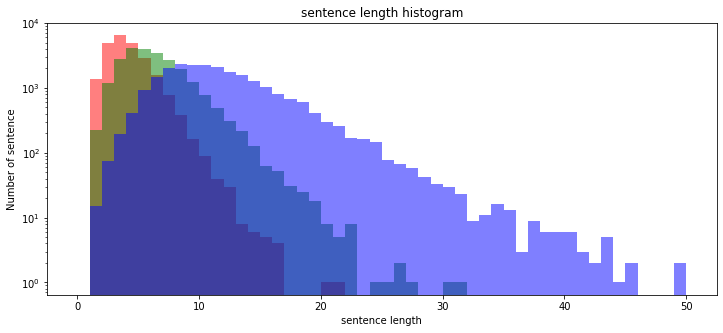

In [20]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0, 50], alpha=0.5, color='r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0, 50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0, 50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title("sentence length histogram")
plt.xlabel('sentence length') # 20정도 선에서 자르기
plt.ylabel('Number of sentence')

In [21]:
print('어절 최대길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간길이: {}'.format(np.median(sent_len_by_token)))
print('제 1 사분위 길이 : {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3 사분위 길이 : {}'.format(np.percentile(sent_len_by_token, 75)))
print('95% 길이 : {}'.format(np.percentile(sent_len_by_token, 95)))

어절 최대길이: 21
어절 최소길이: 1
어절 평균길이: 3.64
어절 표준편차: 1.74
어절 중간길이: 3.0
제 1 사분위 길이 : 2.0
제 3 사분위 길이 : 5.0
95% 길이 : 7.0


In [22]:
print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('제 1 사분위 길이 : {}'.format(np.percentile(sent_len_by_morph, 25)))
print('제 3 사분위 길이 : {}'.format(np.percentile(sent_len_by_morph, 75)))
print('95% 길이 : {}'.format(np.percentile(sent_len_by_morph, 95)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.83
형태소 표준편차: 2.71
형태소 중간길이: 5.0
제 1 사분위 길이 : 4.0
제 3 사분위 길이 : 7.0
95% 길이 : 11.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f285a861bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f285a867c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f285a7f8250>,
 'means': [<matplotlib.lines.Line2D at 0x7f285a870cd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f285a870790>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f285a867210>,
  <matplotlib.lines.Line2D at 0x7f285a811d10>]}

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

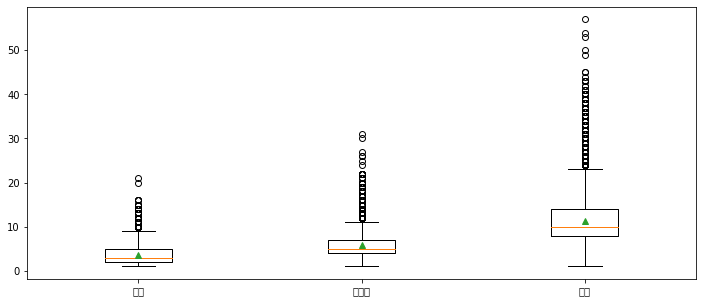

In [26]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol], labels=['어절', '형태소', '음절'], showmeans=True)

In [27]:
# 질문과 답변의 길이
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

In [28]:
query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


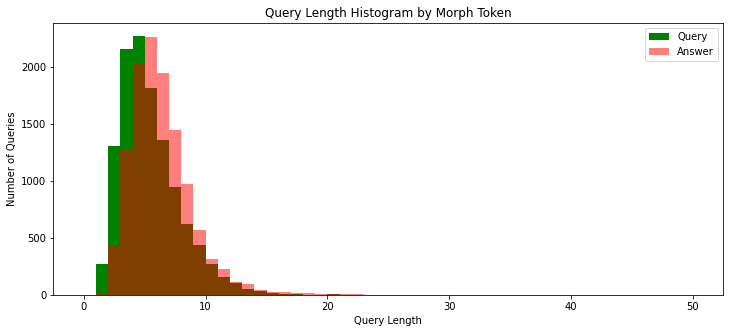

In [29]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

In [30]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)
            
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

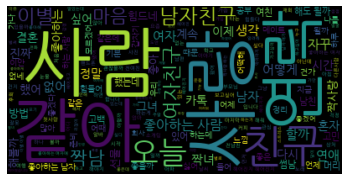

In [32]:
# wordcloud: 큰 인사이트 얻기는 어려움
query_wordcloud = WordCloud(font_path= DATA_PATH + 'NanumGothic.ttf').generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

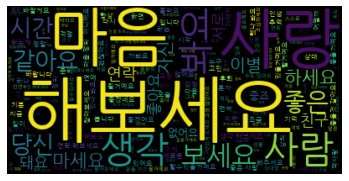

In [36]:
answer_wordcloud = WordCloud(font_path= DATA_PATH + 'NanumGothic.ttf').generate(answer_NVA_token_sentences)

plt.imshow(answer_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()